## __Age Detection__

## Problem Statement :


In this problem we are going to train the model to predict the age of a person just by looking at his/her face.

## Dataset:    
The dataset consists of images(feature) of Indian actors and their age(label) as a label. And here we're going to predict the age of an actor from his/her image. For this purpose, we're going to use Keras, pandas, numpy and convolutional neural network. The dataset we are going to use contains images of over 100 India actors and actresses, which is collected from more than 100 videos. All the images are cropped from the video frames resulting in a high degree of variability in terms of scale, pose, expression, illumination, age, resolution, occlusion, and makeup.

<div>
    <img src="imgs_for_code/34.jpg" alt="Snow" style="width:10%">
    <img src="imgs_for_code/1988.jpg" alt="Forest" style="width:10%">
    <img src="imgs_for_code/80.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/108.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/12.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/330.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/175.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/166.jpg" alt="Mountains" style="width:10%">
    <img src="imgs_for_code/333.jpg" alt="Mountains" style="width:10%">
</div>




## How are we going to predict age just by using an image?
- Just like a child, we are going to train the model to differentiate between the how a persons face will look like at particular age. 
- If we want to teach a child what a cup looks like, we'll show him a cup and tell him that this is what a cup looks like. So, he'll analyze it, he will look at it's shape, color, size, etc. and that's how he'll learn what a cup looks like.
- We are applying the same concept to teach our model how to differentiate between ages.
- We'll show an image along with it's age, then our model will analyze it and will look at it's shape, color, size, etc. and that's how it'll learn what the face of old, you and middle-aged person looks like.

## Step 1: Import all the required libraries 

__We are going to use following libraries:__


* __Pandas__ : For analysis and manipulation of data 
* __Numpy__ : To handle matrices and arrays of large size
* __Sklearn__ : To easily handle machine learning operations.
* __Keras__ : To easily implement comvolutional neural network
* __Pickle__ : It is an object serializer and we are using it to save our model.
* __Seaborn__ : For statistical data visualization.
* __CV2__ : The library is used for Image Processing

In [1]:
import keras
import sklearn
import pandas as pd
import numpy as np
import pickle
import seaborn
import os.path
import cv2
import warnings
warnings.filterwarnings('ignore')
import matplotlib

Using TensorFlow backend.
/home/akanksha/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/akanksha/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/akanksha/anaconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/akanksha/anaconda3/e

## <b>Step 2 </b> : Extract all the required data 

Set the path to extract images and store them into a list 'images'.

1. __Images__ : This is the food for our model. It contains the images we’re going to use to teach our model.

2. __img_name_with_Label.csv__ : This contains the labels for the images in Images dataset, i.e., if the person in the image is young, middle-aged or old.

- Combine the training and testing datasets in the form of an array to teach our model what a young, middle-aged and old person looks like.

- Import the CVS file containing the name of the images and its labels (age).

In [2]:
try:
    data_labels = pd.read_csv('Data/Data.csv')
except FileNotFoundError:
    print("File does not exist!")

## __Data Exploration__:
- To build a model, it is very important for us to understand the data we are dealing with.
- We'll need to know what is going to be feature and label to train our model.
- __Feature :__ Feature is nothing but the input we are going to provide.
- __Label :__ Label is what we want as an output.
- For this let's see what do we have in the data

In [3]:
print("Disply top 5 observations in img_name_with_Label.csv file : \n{0} ".format(data_labels.head()) )

Disply top 5 observations in img_name_with_Label.csv file : 
   Unnamed: 0         ID   Class
0           0    377.jpg  MIDDLE
1           1  17814.jpg   YOUNG
2           2  21283.jpg  MIDDLE
3           3  16496.jpg   YOUNG
4           4   4487.jpg  MIDDLE 


- Here we can see that our data contains two columns
       - 1. ID
       - 2. Class

- Along with this csv file, we have one more folder as Images, which contains actual images of Indian actors, and using this we are going to train a model.
- Here we are going to predict age of the person by looking at his image.
- So, we can say that, the input for our model in an image of a person and output will be the person's age.
    - Image with ID is feature
    - Class label

In [4]:
print("So the image with label looks like : ")

So the image with label looks like : 





- Here we can see that labels are categorized into 3 groups
    * OLD
    * MIDDLE 
    * YOUNG

In [5]:
data_labels['Class'].unique()

array(['MIDDLE', 'YOUNG', 'OLD'], dtype=object)

## __Data Visualization :__
- The following figure shows number of observations with age Middle, Yound and Old.

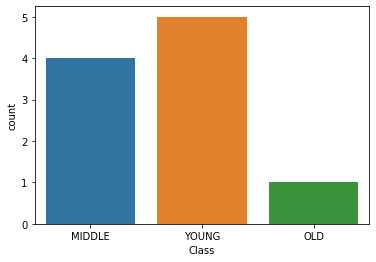

In [6]:
seaborn.countplot(data_labels.Class, data = data_labels)

Now we'll
* __Resize the images__  
* __assign proper label to the array form of an image__ 
* __Save image in numpy array in numerical form__
* __Save age as labels in numpy array__


The size of the image affects the computation time. So to reduce the computation time, we'll need to reduce the size of the image.  

In [7]:
path = "Data/Images/"
features=[]
image_name = data_labels['ID'].values
for i in range(len(image_name)):
    img = cv2.imread(path+image_name[i]) # Load image
    resize_img = cv2.resize(img,(64,64))  # Resize each image as 64x64
    features.append(resize_img) 
    
features = np.array(features)
labels = data_labels['Class']

In [8]:
(pd.DataFrame([features, labels], index = ['image', 'age']).T).to_csv('CSVs/01_new_data.csv')

It is very difficult to keep track of all the values in matrix, by looking at its shape, we can say if we going in the right direction or not. By using ".shape" we can see shape of a matrix.

In [9]:
print("The shape of matrices for features is {0} and labels is {1}".format(features.shape, labels.shape))

The shape of matrices for features is (10, 64, 64, 3) and labels is (10,)


- features vector contains a 4-D matrix, where 
    - 10 : Number of observations in dataset
    - 64, 64 : size of each image
    - 3 : RGB image, hence 3 Dimensions
    
- labels vector is a 1-D matrix with 10 observations and 1 column.

Now, this how the data and labels will become : 


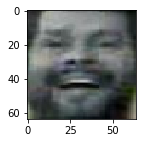

MIDDLE


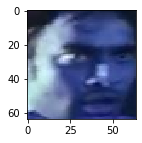

YOUNG


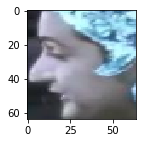

MIDDLE


In [10]:
print("Now, this how the data and labels will become : ")
for i in range(3):
    matplotlib.pyplot.figure(figsize = (2,2))
    imgplot = matplotlib.pyplot.imshow(features[i])
    matplotlib.pyplot.show()
    print(labels[i])
    print("="*90)

## Step 3 : Data Pre-processing

- Here labels are in text form, so we need to convert them to numerical form. 
- Using label encoder we give a random unique id to each unique value.
- We'll have to convert string data into the numerical format by assigning a numerical value to each unique element, because machine can understand numeric data only.

In [11]:
temp = {i: j for j, i in enumerate(set(labels))} 
print('The values we are going to assign are : {}'.format(temp))
encoded_labels = np.array([temp[i] for i in labels] )

The values we are going to assign are : {'MIDDLE': 0, 'YOUNG': 1, 'OLD': 2}


In [12]:
encode_df = pd.DataFrame({'Original_Labels': labels.values, "encoded_labels": encoded_labels})
encode_df.to_csv("CSVs/02_encoded_data.csv")

In [13]:
print("Original labels : \n {}".format(labels[:10]))
print('='*70)
print("Changed labels : \n {}".format(encoded_labels[:10]))

Original labels : 
 0    MIDDLE
1     YOUNG
2    MIDDLE
3     YOUNG
4    MIDDLE
5    MIDDLE
6     YOUNG
7     YOUNG
8     YOUNG
9       OLD
Name: Class, dtype: object
Changed labels : 
 [0 1 0 1 0 0 1 1 1 2]


## Step 4: Split the data into train and test set
- Now our data is ready to feed to the program. But here we'll split the data into train and test dataset so that after training the model we can test the model on the test dataset and find out how accurate are its predictions.
- Here we are splitting the data so that the training dataset contains 80% of the data and the test dataset contains 20% of the total data.
- Here we are using the train_test_split method from the sklearn library. We'll train our model on x_train and y_train, test it on x_test and y_test.

- test_size: Here we specify the size we want for our test dataset.
- random_state: When we use a random number generator for number or sequence generation, we give a starting number (AKA seed). When we provide the same seed, every time it’ll generate the same sequence as the first one. That’s why to keep the same random values every time, we give seed as random_state in train_test_split().

In [14]:
import sklearn.model_selection
train_set, test_set, train_label, test_label = sklearn.model_selection.train_test_split(features, encoded_labels,
                                                                                                test_size = 0.20, 
                                                                                                random_state = 42)

In [16]:
print("Shape of feature_train is {}".format(train_set.shape))
print("Shape of label_train is {}".format(train_label.shape))
print("Shape of feature_test is {}".format(test_set.shape))
print("Shape of label_test is {}".format(test_label.shape))

Shape of feature_train is (8, 64, 64, 3)
Shape of label_train is (8,)
Shape of feature_test is (2, 64, 64, 3)
Shape of label_test is (2,)


## Step 5: Define the structure of the neural network

- Artificial neural networks or connectionist systems are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules.
- Neural network consists of 3 parts:
    - Input Layer
    - Hidden Layer of neurons
    - The output layer (a.k.a. the prediction)
- The arrows that connect the dots show how all the neurons are interconnected and how data travels from the input layer all the way through to the output layer.

<div>
    <img src="imgs_for_code/neural_network_1.png" alt="Mountains" style="width:100%">
</div>


- Input Layer: It contains the input for our neural network
- Hidden Layer: It is in the hidden layers where all the processing actually happens through a system of connections characterized by weights and biases (commonly referred as W and b): the input is received, the neuron calculates a weighted sum adding also the bias and according to the result and a pre-set activation function. Afterward, the neuron transmits the information downstream to other connected neurons in a process called ‘forward pass’. At the end of this process, the last hidden layer is linked to the output layer which has one neuron for each possible desired output.
- Output Layer: It gives us the output for our neural network.

Add layers to the neural network using the .add method

The model needs to know what input shape it should expect. For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape

### __Convolutional layer__:
A convolutional layer that extracts features from a source image. Convolution helps with blurring, sharpening, edge detection, noise reduction, or other operations that can help the machine to learn specific characteristics of an image.

### __MaxPooling2D__
- A pooling layer that reduces the image dimensionality without losing important features or patterns.
- The max-pooling is saying, if the feature is detected anywhere in this filter then keep a high number. But the main reason why people are using pooling because of its works well in practice and reduce computations.
<img src="imgs_for_code/pooling.png" alt="Drawing" style="width: 100%;"/>


### __Flatten__
- In flatten, we combine all the data to form a single array. And then we feed it to the neural network.
- Here we are arranging each row over another vertically to convert the matrix into an array.
<img src="imgs_for_code/flatten.png" alt="Drawing" style="width: 100%;"/>


### __Dense__:
- A fully connected layer also known as the dense layer, in which the results of the convolutional layers are fed through one or more neural layers to generate a prediction.
- In simple words, a dense layer is where each unit or neuron is connected to each neuron in the next layer.
<div>
    <img src="imgs_for_code/all_layers.png" alt="Drawing" style="width: 100%;"/>
</div>

### Activation Function : 
- It is a function that you use to get the output of the node. It is also known as Transfer Function.
- Their main purpose is to convert an input signal of a node in an A-NN to an output signal.
- It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).
- There are many activation functions: 
#### 1. Sigmoid or Logistic Activation Function:
    - The Sigmoid Function curve looks like an S-shape.
    - The main reason why we use the sigmoid function is that it exists between (0 to 1).
    - Therefore, it is especially used for models where we have to predict the probability as an output.
    - Since the probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
    - The softmax function is a more generalized logistic activation function that is used for multiclass classification.
 <div>
        <img src="imgs_for_code/sigmoid.png" alt="Drawing" style="width:70%;"/>
 </div>

Below are the layers we are going to use for our neural network. 
### __Input Layer :__ 
- Layer_1: This is a convolution layer where we are going to provide the image with input shape (64 x 64 x 3) and relu activation unit with the filter of size (32 x 3 x 3). 
- Layer 2: This is max pool layer with the size of the max pooling window as (2 x 2).
- Layer 3: It is the same as layer 1 but here we don't have to give the shape of input data explicitly.
- Layer 4: It is max pool layer with the size of the max pooling window as (2 x 2).
- Layer 5: Flatten layer combines all the data to form a single array.

- The Sequential model is a linear stack of layers.
- Create an object ( 'classifier' ) of Sequential model from sklearn 

In [17]:
classifier = keras.models.Sequential()

In [18]:
classifier.add(keras.layers.Convolution2D(32,3,3, input_shape=(64,64,3), activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Convolution2D(32,3,3, activation='relu'))
classifier.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
classifier.add(keras.layers.Flatten())

### __Hidden Layers__ : 
- The dense layer is nothing but a hidden layer in our neural network.
- Here we are using activation function as relu and softmax

In [19]:
classifier.add(keras.layers.Dense(activation='relu', output_dim = 100))
classifier.add(keras.layers.Dense(output_dim = 1, activation='softmax'))

Before training a model, you need to configure the learning process, which is done via compile method

- Summary will show the shape of data in each layer.

In [20]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               627300    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

## Step 6 : Train Model using neural network

- Configures the model for training.
- metrics: List of metrics to be evaluated by the model during training and testing. 
- loss : It is a loss function. If the model has multiple outputs, you can use a different loss on each output by passing a dictionary or a list of losses. The loss value that will be minimized by the model will then be the sum of all individual losses.
- Adam is an optimization algorithm that can used to update network weights iterative based in training data.

In [31]:
classifier.compile(metrics=['accuracy'], loss='binary_crossentropy', optimizer='adam')

255 is the maximin pixel value. Rescale 1./255 is to transform every pixel value from range [0,255] -> [0,1]. 

Now we'll apply the neural network we have created to our data.
- fit_generator will load the data into RAM and perform training on batches that we have provided as parameters.
- steps_per_epoch: Number of observations to use in each epoch for training.
- Epochs: Number of iterations.
- validation_data: Test dataset for testing the model.
- validation_steps: Number of observations to use in each epoch for testing.


In [32]:
classifier.fit(train_set,train_label,batch_size = 32, epochs = 10)

Epoch 1/10
8/8 [==============================] - 0s 21ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 4/10
8/8 [==============================] - 0s 6ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 7/10
8/8 [==============================] - 0s 6ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 5.7500 - accuracy: 0.3750
Epoch 10/10
8/8 [==============================] - 0s 6ms/step - loss: 5.7500 - accuracy: 0.3750


## Step 7: Save the model in a pickle file

As logistic_model_cv gave us the highest accuracy we'll go with it and save it to pickle file.
We save our model to pickle files so that when we want to perform predictions on unseen data, we don't have to train our model again. Any object in python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. 

In [34]:
with open('age_detection_model.pkl','wb') as f:
    pickle.dump(classifier,f)
    
classifier.save_weights("age_detection_weights.h5")
print("Saved model to disk")

Saved model to disk


# __Summary__

In this problem we have trained a model to predict the age of a person by looking at the face. For this purpose we used convolutional neural network. We started with a normal picture of person's face and then converted it in the array of number and feed it to the neural network. Using this we'll train the model to predict age of the person. We have seen what are the steps we followed to train like how to reduce the size of an image, what are different layers in neural network, etc. 